# Классификация heart diseases

## Щека Дмитрий, 24.М41

Я подумал, что раз в демо блокноте есть разведочный анализ для датасета с болезнями, то заново проводить его не нужно (ну все равно же потом еще и на своем проводить для доп баллов...)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Чтение данных

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Возьмём данные заболеваний сердца у пациентов, которые можно скачать [тут](https://www.kaggle.com/code/ahmedadell30/heart-disease-prediction-with-ann-models/data).

Описание датасета: <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

Необходимо решить задачу классификации и научиться предсказывать целовой признак **target** имеет ли пациент заболевание сердца.

## EDA

In [3]:
df.target.value_counts()
df.target.mean()

0.5131707317073171

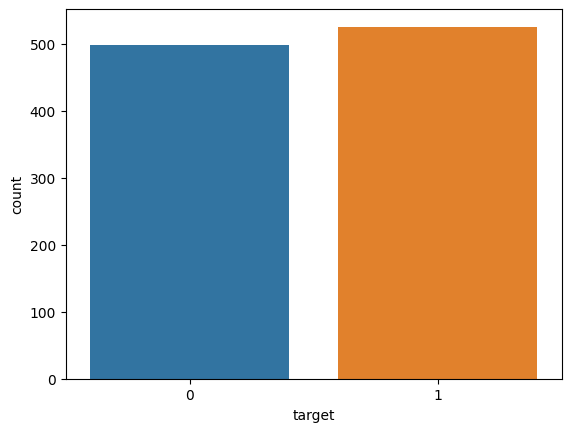

In [4]:
sns.countplot(x="target", data=df)
plt.show()

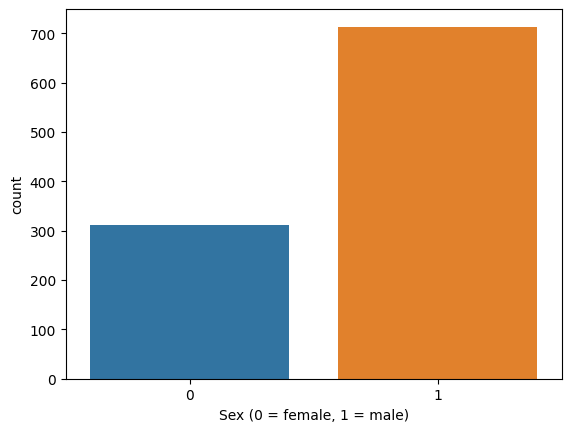

In [5]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


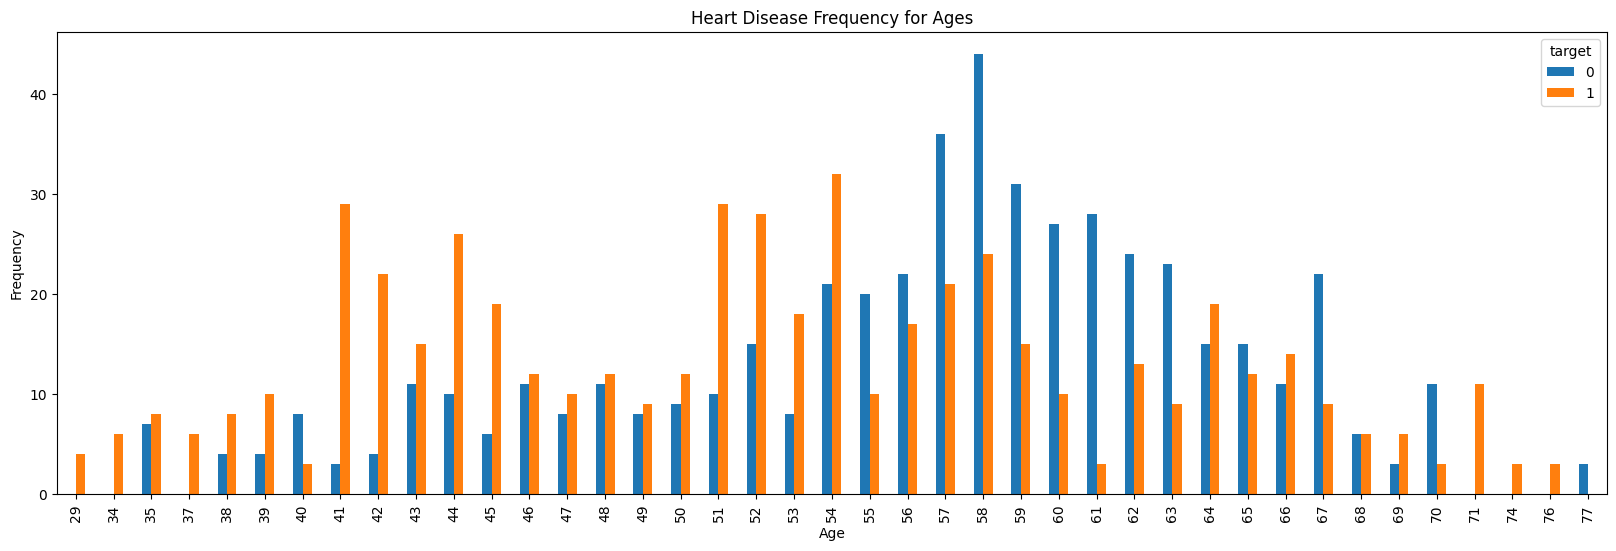

In [7]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

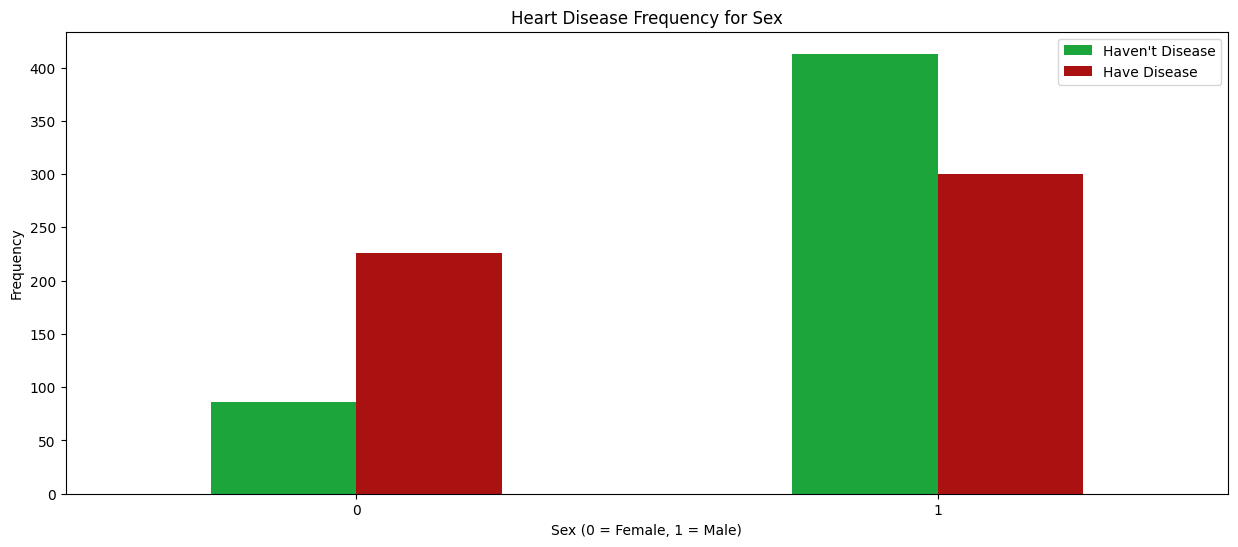

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

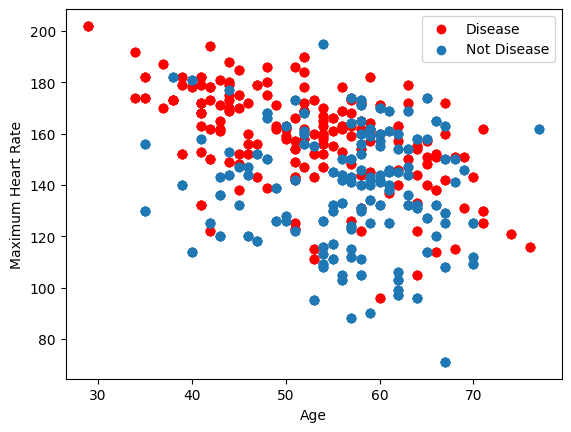

In [9]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

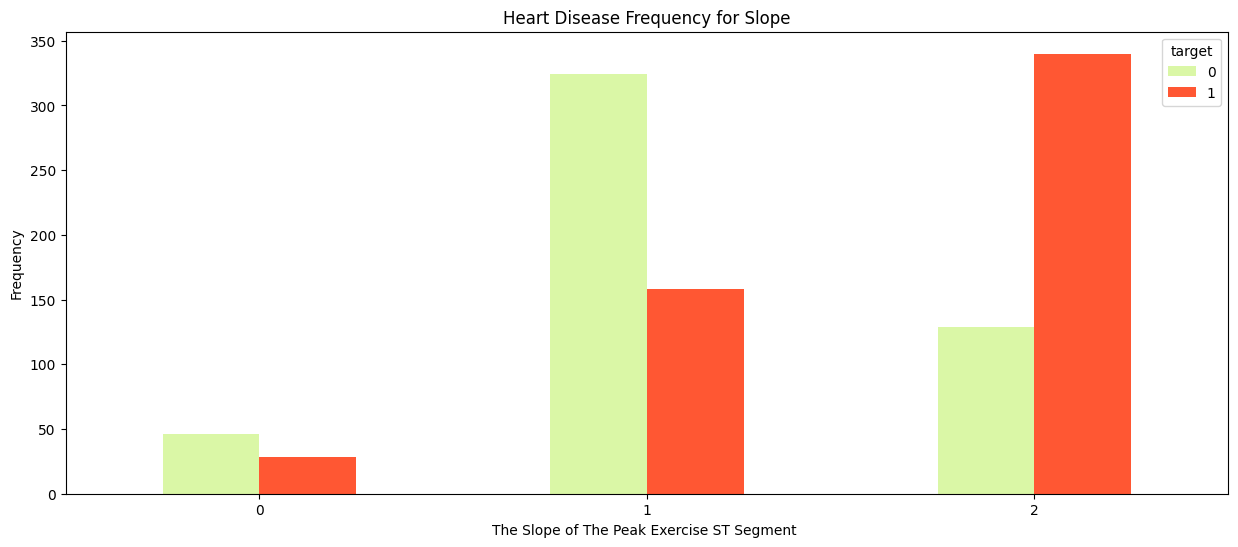

In [10]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

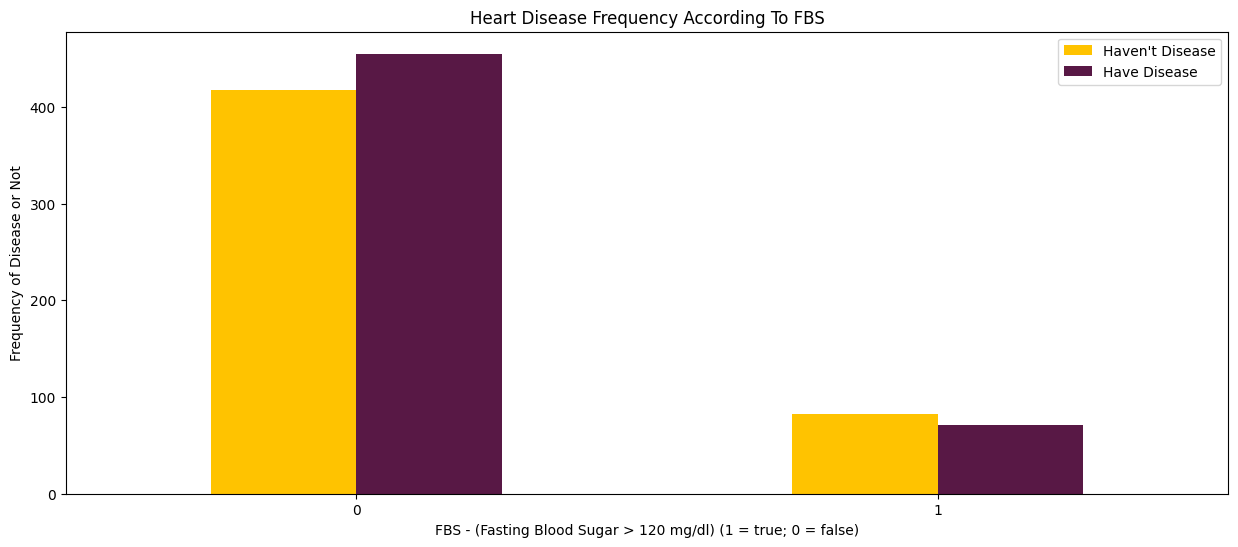

In [11]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

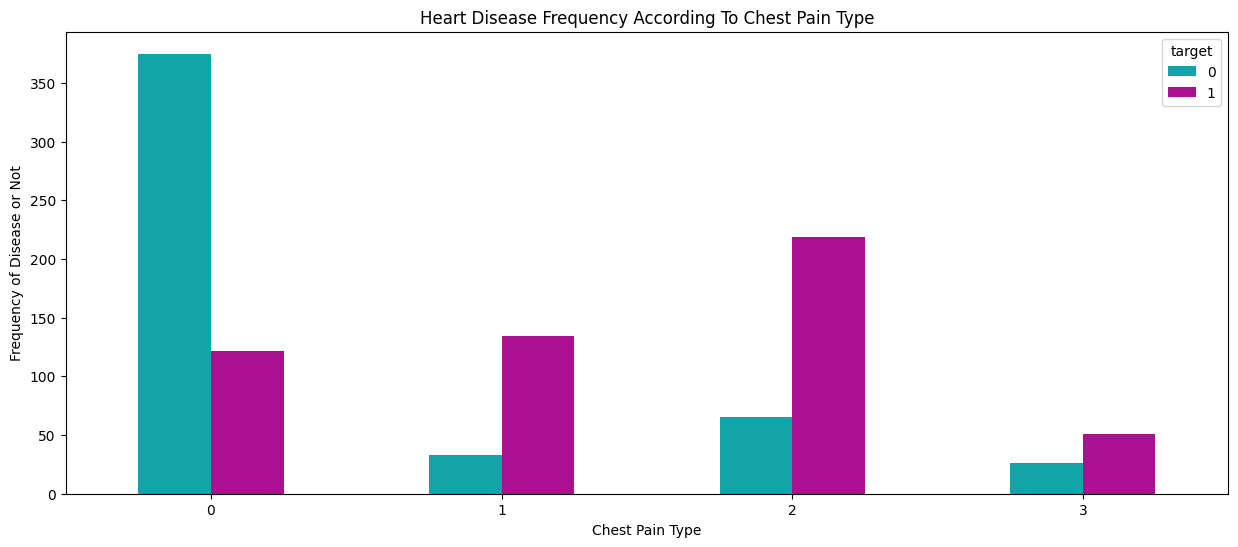

In [12]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [13]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [14]:
df = df.drop(columns = ['cp', 'thal', 'slope', 'cp_0', 'thal_0', 'slope_0'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,0,0,0,0,0,1,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,0,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,0,0,0,0,0,1,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,0,0,0,0,1,0,1,0


## Разбиение данных с использованием train_test_split и масштабирование

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold

accuracies = {}

C = np.arange(1e-05, 5, 0.1)

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=0)

log_clf = GridSearchCV(estimator=LogisticRegression(), cv=rskfold,
              scoring='accuracy', return_train_score=True,
              param_grid={'C':C})

log_clf.fit(X_train_scaled, y_train)
acc = log_clf.score(X_test_scaled, y_test)
accuracies['LogR'] = acc
print("best params: " + str(log_clf.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'C': 4.80001}
Test Accuracy 0.8182


## K-Nearest Neighbour (KNN) Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(1, 11, 2) 
weights = ['uniform', 'distance'] 

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=1)

knn_clf = GridSearchCV(estimator=KNeighborsClassifier(), cv=rskfold,
              scoring='accuracy', return_train_score=True,
              param_grid={'n_neighbors':n_neighbors, 'weights':weights})

knn_clf.fit(X_train_scaled, y_train)
acc = knn_clf.score(X_test_scaled, y_test)
accuracies['KNN'] = acc
print("best params: " + str(knn_clf.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'n_neighbors': 9, 'weights': 'distance'}
Test Accuracy 1.0000


## Support Vector Machine (SVM)

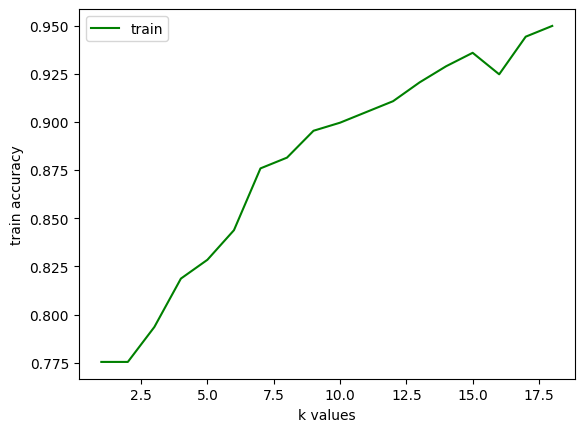

In [18]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

svm = SVC(random_state=11)

accuracy_list_train = []
k = np.arange(1, len(df.columns))

for i in k:
    x_new = SelectKBest(f_classif, k=i).fit_transform(X_train_scaled, y_train)
    svm.fit(x_new, y_train)
    accuracy_list_train.append(svm.score(x_new, y_train))   
    
plt.plot(k,accuracy_list_train, color="green", label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [19]:
C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=2)

grid_svm = GridSearchCV(estimator=svm, cv=rskfold, 
        param_grid=dict(kernel=kernel,C=C, gamma=gamma),refit='Accuracy')

grid_svm.fit(X_train_scaled, y_train)
acc = grid_svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("best params: " + str(grid_svm.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy 0.9708


## Naive Bayes Algorithm

In [20]:
from sklearn.naive_bayes import GaussianNB

priors = [None, [0.49, 0.51]]
var_smoothing = np.logspace(0, -9, num=100) # portion of the largest variance of all features that is added to variances for calculation stability

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=3)

nb_clf = GridSearchCV(estimator=GaussianNB(), cv=rskfold,
              scoring='accuracy', return_train_score=True,
              param_grid={'priors':priors, 'var_smoothing':var_smoothing})

nb_clf.fit(X_train_scaled, y_train)
acc = nb_clf.score(X_test_scaled, y_test)
accuracies['NB'] = acc
print("best params: " + str(nb_clf.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'priors': None, 'var_smoothing': 0.08111308307896872}
Test Accuracy 0.8247


## Decision Tree Algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

criterion = ["gini", "entropy", "log_loss"]
splitter = ["best", "random"]
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]
min_samples_split = [2, 4, 6, 10]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12]
max_features = np.arange(2, 19, 4)

skfold = StratifiedKFold(n_splits=4)

decision_tree = DecisionTreeClassifier(random_state=81)
grid_dt = GridSearchCV(estimator=decision_tree, cv=skfold, 
        param_grid=dict(criterion=criterion,splitter=splitter, max_depth=max_depth,
                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                        max_features= max_features), refit='Accuracy')

grid_dt.fit(X_train, y_train)
acc = grid_dt.score(X_test, y_test)
accuracies['DT'] = acc
print("best params: " + str(grid_dt.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Test Accuracy 0.9513


# Реализация KNN

In [22]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5, weights='uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def distance(self, x_train_i, x_test_i):
        return np.sqrt(np.sum((x_train_i - x_test_i) ** 2))

    def make_prediction(self, x_test_i):
        distances = []
        for x in self.X_train:
            distances.append(self.distance(x, x_test_i))
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = []
        y_list = self.y_train.to_list()
        for ind in k_nearest_indexes:
            targets.append(y_list[ind])
        
        if self.weights == 'distance':
            closest_distance = distances[k_nearest_indexes[0]]
            weighted_targets = {}
            for index in k_nearest_indexes:
                if targets[index] not in weighted_targets:
                    weighted_targets[targets[index]] = 0.0
                weighted_targets[targets[index]] += distances[index] / closest_distance
            return max(weighted_targets, key=weighted_targets.get)
        
        return np.bincount(targets).argmax()
    
    def predict(self, X_test):
        return np.array([self.make_prediction(x) for x in X_test])

In [23]:
n_neighbors = np.arange(1, 11, 2) 
weights = ['uniform', 'distance'] 

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=5)

myknn_clf = GridSearchCV(estimator=MyKNN(), cv=rskfold,
              scoring='accuracy', return_train_score=True,
              param_grid={'n_neighbors':n_neighbors, 'weights':weights})

myknn_clf.fit(X_train_scaled, y_train)
y_pred = myknn_clf.predict(X_test_scaled)
acc = accuracy_score(y_pred, y_test)
accuracies['MyKNN'] = acc
print("best params: " + str(myknn_clf.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'n_neighbors': 1, 'weights': 'uniform'}
Test Accuracy 0.9805


# Реализация Logistic Regression

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.spatial import distance

class MyLogRegression(BaseEstimator, ClassifierMixin): 
    def __init__(self, learning_rate = 1, tol = 0.01):         
        self.learning_rate = learning_rate 
        self.tol = tol
           
    def fit(self, X, Y):                  
        self.m, self.n = X.shape         
        self.W = np.zeros(self.n)         
        self.b = 0        
        self.X = X         
        self.Y = Y 
        
        i = 1
        while(self.update_weights(i)):
            i += 1
            
        return self
      
    def update_weights(self, i) :            
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b))) 
                  
        tmp = (A - self.Y.T)         
        tmp = np.reshape(tmp, self.m)         
        dW = np.dot(self.X.T, tmp) / self.m          
        db = np.sum(tmp) / self.m  
        
        new_W = self.W - self.learning_rate * (1/np.sqrt(i)) * dW 
        new_b = self.b - self.learning_rate * (1/np.sqrt(i)) * db 
        if (distance.euclidean(new_W, self.W) + abs(new_b - self.b) < self.tol):
            return False
        
        self.W = new_W    
        self.b = new_b
          
        return True
      
    def predict(self, X):     
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))         
        Y = np.where(Z > 0.5, 1, 0)         
        return Y 

In [25]:
tol = np.logspace(-3, 0, 6)
learning_rate = np.logspace(-1, 1, 6, base=2)

rskfold = RepeatedStratifiedKFold(n_splits=4, random_state=6)

mylog_clf = GridSearchCV(estimator=MyLogRegression(), cv=rskfold,
              scoring='accuracy', return_train_score=True,
              param_grid={'tol':tol, 'learning_rate':learning_rate})

mylog_clf.fit(X_train_scaled, y_train)
y_pred = mylog_clf.predict(X_test_scaled)
acc = accuracy_score(y_pred, y_test)
accuracies['MyLogR'] = acc
print("best params: " + str(mylog_clf.best_params_))
print("Test Accuracy {:.4f}".format(acc))

best params: {'learning_rate': 0.5, 'tol': 0.001}
Test Accuracy 0.8149


## Comparing Models

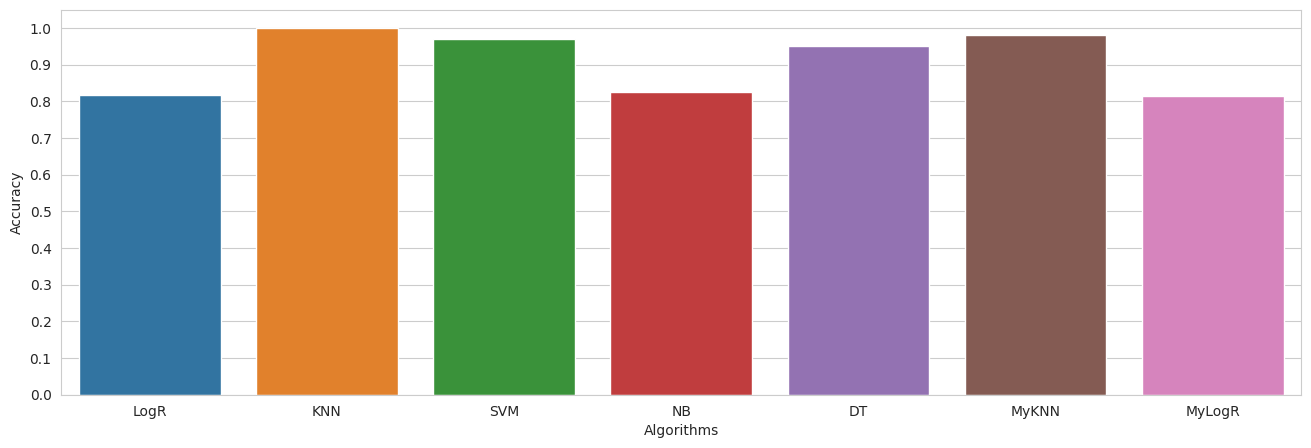

In [26]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

## Confusion Matrix

In [27]:
# Predicted values
y_head_lr = log_clf.predict(X_test_scaled)
y_head_mylr = mylog_clf.predict(X_test_scaled)
y_head_knn = knn_clf.predict(X_test_scaled)
y_head_myknn = myknn_clf.predict(X_test_scaled)
y_head_svm = grid_svm.predict(X_test_scaled)
y_head_nb = nb_clf.predict(X_test_scaled)
y_head_dtc = grid_dt.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_mylr = confusion_matrix(y_test, y_head_mylr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_myknn = confusion_matrix(y_test, y_head_myknn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

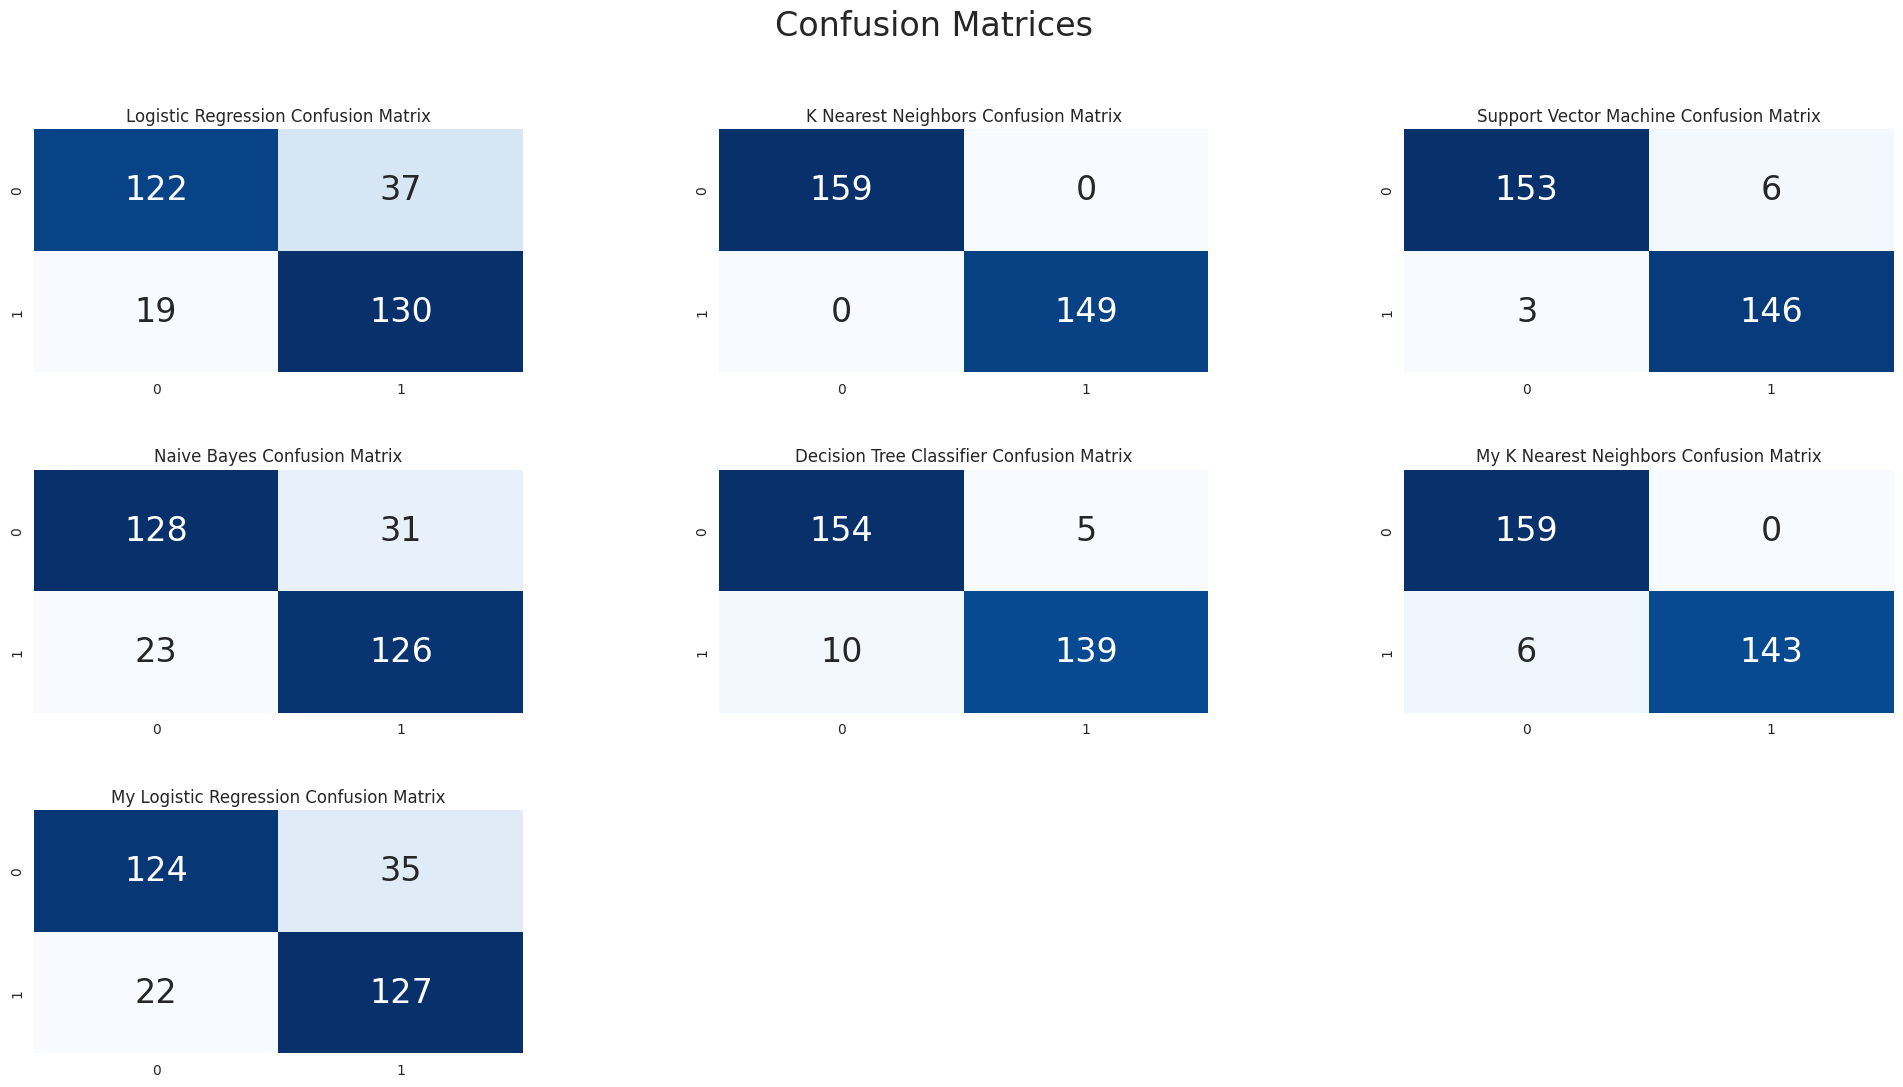

In [29]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("My K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_myknn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("My Logistic Regression Confusion Matrix")
sns.heatmap(cm_mylr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


- Лучшей моделью для этих данных оказалась KNN: Библиотечная реализация на тестовой выборке имеет точность 1, а моя реализация немного хуже: 0.98
- Хуже всего показала себя логистическая регрессия, у моей реализации и библиотечной точность составила 0.81
- Даже наивный Байес превзошел логистическую регрессию по точности (до того, как я убрал лишние бинарные параметры, которые получились с помощью get_dummies, он имел худшую точность)
- SVM и дерево решений показали просто хороший результат